# Project 2: Investigate a Dataset - TMDb Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I will load and investigate the data of the following data set:

 * **TMDb movie data** (cleaned from original data on Kaggle)

#### Overview and Notes
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

 * Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
 * There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
 * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
 
#### Questions:
 * Which genres have the highest amount of movies?
 * What are the genres with the highest average popularity from year to year? 
 * How does the trend of the budget look like over the years?
 * How is the correlation between budget and revenue?


<a id='wrangling'></a>
## Data Wrangling

In this section of the Jupyter Notebook, I will load the dataset, check for cleanliness, and trim and clean the dataset for the data analysis as much as nesessary.

### General Properties

In [1]:
# First step in every Jupyter Notebook Analysis.
# The import of all needed packages for this analysis.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

os.chdir('C:/Users/drnovsek/jupyternotebooks/udacity/dand/project2')

In [2]:
# I will perform operations to inspect data types and to look for instances of missing or possibly errant data.

# Load the CSV File
df = pd.read_csv("tmdb-movies.csv")

# Load a few rows of the dataset with the help of the head function
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Get some info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> The data set contains 10,866 rows (entries) and 21 columns (dimensions/attributes/metrics).
> There are some columns with missing data (e.g. homepage). Some of those fields might not be necessary for my analysis. Depending on the amount of data, it might be good to drop those columns for our analysis. In our case, it shouldn't be relevant though.
>
> Most important, none of the numeric fields have null values.


In [4]:
# Let's double check each row for the amount of nulls
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# Let's get some more details of the variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Budget, Revenue, Runtime, *_adj have a minimum of 0 (zero) values. This could be an issue within the data set.

### Data Cleaning
Data cleaning is a very important step in the data analysis process.  
We will look for duplicates, remove zero values and rows with too many null values.

In [6]:
# Find duplicates in the dataframe (based on the entire row)
df.duplicated().sum()

1

> There is only one duplicate row in our data set.

In [7]:
# List duplicates in the dataframe (based on the entire row)
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Drop duplicates and keep last. inplace=True overwrites the exisiting dataframe.
df.drop_duplicates(subset="id",keep="last",inplace=True)

In [9]:
# Re-check for duplicates
df.duplicated().sum()

0

In [10]:
# As already mentioned, the 'homepage' column has a lot of null values and provides only little relevance
# for our analytics questions. Therefore, it can be dropped.

df.drop('homepage', axis=1, inplace=True)

In [11]:
# Count 'zeros' for revenue
df.query('revenue == 0').revenue.count()

6016

In [12]:
# Count 'zeros' for revenue_adj
df.query('revenue_adj == 0').revenue_adj.count()

6016

In [13]:
# Count 'zeros' for budget
df.query('budget == 0').revenue_adj.count()

5696

In [14]:
# Count 'zeros' for budget_adj
df.query('budget == 0').budget_adj.count()

5696

Let's drop some unnecessary and fragmentary data and write the result in a new dataframe.

In [15]:
# Create a new datafrane by copying the original DF. At the same time we drop the 'revenue' column.
df_cleaned = df.drop('revenue', axis=1)

In [16]:
# Let's also drop the 'budget' column as this has lots of 0 values too
df_cleaned.drop('budget', axis=1, inplace=True)

In [17]:
# Removing rows which have no revenue data
df_cleaned = df_cleaned[df.revenue_adj > 0]

In [18]:
# Removing rows which have no budget data
df_cleaned = df_cleaned[df_cleaned.budget_adj > 0]

In [19]:
# Show sizes of original and cleaned datasets
print(df_cleaned.shape, df.shape)

(3854, 18) (10865, 20)


In [20]:
# Show the cleaned dataframe
df_cleaned.head()

,id,imdb_id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> I've a cleaned my dataset by removing not needed columns and values with missing budget and revenue. 
However, I lost many records within the dataset. Therefore, it might be better to use the original data set for some questions and clean according to the specific question.

<a id='eda'></a>
## Exploratory Data Analysis

> Now, that I've trimmed and cleaned the data, I am ready to move on to exploration. Let's compute statistics and create visualizations with the goal of addressing the questions that I posed in the Introduction section.

### Research Question 1: Which genres have the highest amount of movies?

In [21]:
# Count over genres
df_cleaned.groupby('genres')['id'].count()

genres
Action                                                 21
Action|Adventure                                        6
Action|Adventure|Animation|Family|Fantasy               1
Action|Adventure|Animation|Family|Science Fiction       1
Action|Adventure|Animation|Science Fiction              1
Action|Adventure|Animation|Science Fiction|Thriller     1
Action|Adventure|Comedy                                15
Action|Adventure|Comedy|Crime                           3
Action|Adventure|Comedy|Crime|Drama                     2
Action|Adventure|Comedy|Crime|Thriller                  4
Action|Adventure|Comedy|Drama                           1
Action|Adventure|Comedy|Drama|Family                    1
Action|Adventure|Comedy|Drama|Mystery                   1
Action|Adventure|Comedy|Drama|Science Fiction           2
Action|Adventure|Comedy|Drama|Western                   1
Action|Adventure|Comedy|Family                          5
Action|Adventure|Comedy|Family|Fantasy                  3
Action|

> As mentioned within the notes in the introduction above, a movie can have multiple genres assigned to.  
>The genres are separated by pipe character.

In [22]:
# let's create a new dataframe with the most relevant data for the genre questions
df_rq1 = df_cleaned.loc[:,['id', 'release_year', 'genres', 'popularity', 'vote_count', 'vote_average']]

In [23]:
df_rq1.head()

,id,release_year,genres,popularity,vote_count,vote_average
0,135397,2015,Action|Adventure|Science Fiction|Thriller,32.985763,5562,6.5
1,76341,2015,Action|Adventure|Science Fiction|Thriller,28.419936,6185,7.1
2,262500,2015,Adventure|Science Fiction|Thriller,13.112507,2480,6.3
3,140607,2015,Action|Adventure|Science Fiction|Fantasy,11.173104,5292,7.5
4,168259,2015,Action|Crime|Thriller,9.335014,2947,7.3


In [24]:
# We split by | to get an array of genres
df_rq1.genres = df_rq1.genres.str.split('|')

In [25]:
df_rq1.head()

,id,release_year,genres,popularity,vote_count,vote_average
0,135397,2015,"[Action, Adventure, Science Fiction, Thriller]",32.985763,5562,6.5
1,76341,2015,"[Action, Adventure, Science Fiction, Thriller]",28.419936,6185,7.1
2,262500,2015,"[Adventure, Science Fiction, Thriller]",13.112507,2480,6.3
3,140607,2015,"[Action, Adventure, Science Fiction, Fantasy]",11.173104,5292,7.5
4,168259,2015,"[Action, Crime, Thriller]",9.335014,2947,7.3


> We should try to create a new row for each genre and join it with the original dataframe for our analysis.

In [26]:
# Create series from the array and explode the genre arrays to get them into one row each
df_rq1_temp = df_rq1.genres.apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('genres') 

In [27]:
df_rq1_temp.head()

,genres
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action


In [28]:
# Join on the index without 'on=' parameter
df_rq1 = df_rq1.drop(['genres'], axis=1).join(df_rq1_temp, how='inner')

In [29]:
df_rq1.head(10)

,id,release_year,popularity,vote_count,vote_average,genres
0,135397,2015,32.985763,5562,6.5,Action
0,135397,2015,32.985763,5562,6.5,Adventure
0,135397,2015,32.985763,5562,6.5,Science Fiction
0,135397,2015,32.985763,5562,6.5,Thriller
1,76341,2015,28.419936,6185,7.1,Action
1,76341,2015,28.419936,6185,7.1,Adventure
1,76341,2015,28.419936,6185,7.1,Science Fiction
1,76341,2015,28.419936,6185,7.1,Thriller
2,262500,2015,13.112507,2480,6.3,Adventure
2,262500,2015,13.112507,2480,6.3,Science Fiction


> The result is a dataframe containing each movie, its' assigned genre(s), its' popularity and the year of release.

In [30]:
# Now we can better count on each genre
df_rq1.groupby('genres')['id'].count()

genres
Action             1085
Adventure           749
Animation           201
Comedy             1358
Crime               651
Documentary          35
Drama              1756
Family              425
Fantasy             396
Foreign              13
History             129
Horror              463
Music               136
Mystery             344
Romance             667
Science Fiction     519
TV Movie              1
Thriller           1204
War                 119
Western              52
Name: id, dtype: int64

In [31]:
# Let's try to sort the count and to create a Top10 genres list (by number of movies)
df_rq1.groupby('genres')['id'].count().nlargest(10).reset_index(name='count').sort_values(['count'], ascending=False)

,genres,count
0,Drama,1756
1,Comedy,1358
2,Thriller,1204
3,Action,1085
4,Adventure,749
5,Romance,667
6,Crime,651
7,Science Fiction,519
8,Horror,463
9,Family,425


Text(0, 0.5, '# of Movies')

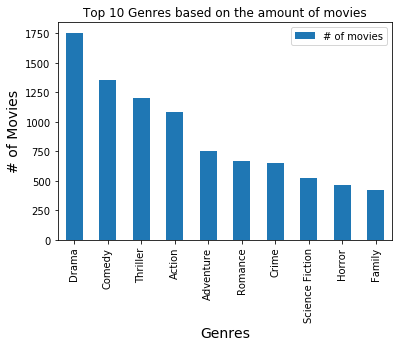

In [32]:
# Finally, I copy the Top10 in a new dataframe and create a bar chart of it
top10_genres = df_rq1.groupby('genres')['id'].count().nlargest(10).reset_index(name='# of movies').sort_values(['# of movies'], ascending=False)
top10_genres.plot(x='genres',y='# of movies',kind='bar', title='Top 10 Genres based on the amount of movies')
plt.xlabel('Genres', fontsize='14')
plt.ylabel('# of Movies', fontsize='14')

> The table and the bar chart above show the Top 10 genres with the hightest amount of produced movies.

### Research Question 2:  What are the genres with the highest average popularity from year to year? 

In [33]:
# let's create a new dataframe for that question
# Actually we can get the data by grouping by and copying the dataframe from question 1 
df_rq2 = df_rq1.groupby(['release_year','genres'])['popularity'].mean()

In [34]:
df_rq2.head(20)

release_year  genres   
1960          Action       1.504538
              Adventure    1.872132
              Comedy       0.501564
              Drama        1.564871
              History      1.136943
              Horror       2.610362
              Romance      0.501564
              Thriller     2.610362
              Western      1.872132
1961          Action       0.464139
              Adventure    1.693268
              Animation    2.631987
              Comedy       1.244521
              Crime        0.900245
              Drama        0.753022
              Family       1.467885
              History      0.538364
              Horror       0.249542
              Music        0.900245
              Romance      1.752027
Name: popularity, dtype: float64

In [35]:
# The above table needs to be completed with a new index and a name for the new column
df_rq2 = df_rq1.groupby(['release_year','genres'])['popularity'].mean().reset_index(name='avg_popularity')

In [36]:
df_rq2.head(10)

,release_year,genres,avg_popularity
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.501564
3,1960,Drama,1.564871
4,1960,History,1.136943
5,1960,Horror,2.610362
6,1960,Romance,0.501564
7,1960,Thriller,2.610362
8,1960,Western,1.872132
9,1961,Action,0.464139


In [37]:
# Let's try to get the highest average popularity for each genre per year
df_rq2 = df_rq2.set_index(['genres']).groupby('release_year')['avg_popularity'].nlargest(1).reset_index()
df_rq2

,release_year,genres,avg_popularity
0,1960,Horror,2.610362
1,1961,Animation,2.631987
2,1962,Thriller,3.170651
3,1963,Adventure,1.586280
4,1964,Action,3.153791
5,1965,Thriller,1.910465
6,1966,Drama,0.485092
7,1967,Animation,2.550704
8,1968,Mystery,1.728887
9,1969,Action,1.778746


> Looking at the table above, it looks like there is no specific trendy genre in the 60s and 70s.  
> But starting from the 80s, there seems to be some specific genres with a high average of popularity.  
  
> Finally, let's count each genre to see which genre is most popular over the years.

In [38]:
# Groupby genre and count them to get the number of times they were most popular
df_rq2_test = df_rq2.groupby('genres')['release_year'].count().reset_index(name='count')
df_rq2_test = df_rq2_test.sort_values('count', ascending=False)
df_rq2_test

,genres,count
2,Animation,15
6,Fantasy,9
1,Adventure,6
10,Science Fiction,4
0,Action,3
3,Crime,3
5,Family,3
12,War,3
4,Drama,2
7,Horror,2


Text(0, 0.5, '# of Years')

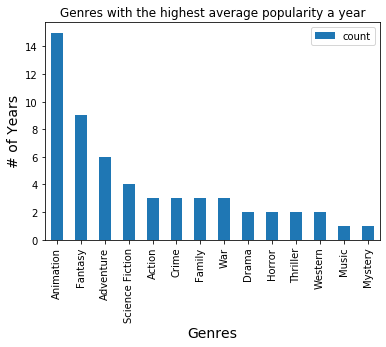

In [39]:
# Create a bar chart of it
df_rq2_test.plot(x='genres',y='count',kind='bar', title='Genres with the highest average popularity a year')
plt.xlabel('Genres', fontsize='14')
plt.ylabel('# of Years', fontsize='14')

### Research Question 3: How does the trend of the budget look over the years?

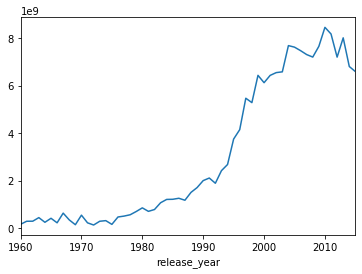

In [40]:
# Let's sum up the budget by year
df_cleaned.groupby('release_year')['budget_adj'].sum().plot(kind='line');

> The big increase of the budget might be due to the number of movies that were produced year over year.

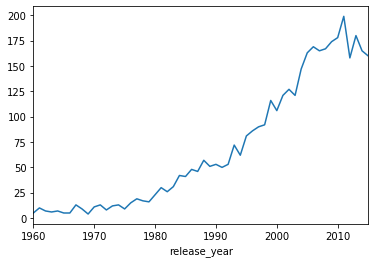

In [41]:
# Let's check the amount of produced movies per year
df_cleaned.groupby('release_year')['id'].count().plot(kind='line');

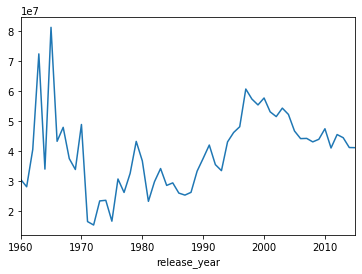

In [42]:
# To get a better picture of the budget per year, let's use the mean function
df_cleaned.groupby('release_year')['budget_adj'].mean().plot(kind='line');

In [43]:
df_cleaned.groupby('release_year')['budget_adj'].mean()

release_year
1960    3.068179e+07
1961    2.818516e+07
1962    4.062476e+07
1963    7.252496e+07
1964    3.408189e+07
1965    8.138583e+07
1966    4.335538e+07
1967    4.802007e+07
1968    3.757895e+07
1969    3.394782e+07
1970    4.896551e+07
1971    1.657066e+07
1972    1.542484e+07
1973    2.346184e+07
1974    2.367112e+07
1975    1.670251e+07
1976    3.078131e+07
1977    2.629221e+07
1978    3.267392e+07
1979    4.332191e+07
1980    3.682018e+07
1981    2.332241e+07
1982    2.988812e+07
1983    3.426817e+07
1984    2.863928e+07
1985    2.948170e+07
1986    2.607366e+07
1987    2.540404e+07
1988    2.632559e+07
1989    3.338586e+07
1990    3.768030e+07
1991    4.210874e+07
1992    3.557618e+07
1993    3.355815e+07
1994    4.315594e+07
1995    4.629300e+07
1996    4.821614e+07
1997    6.080297e+07
1998    5.746289e+07
1999    5.549679e+07
2000    5.780982e+07
2001    5.319091e+07
2002    5.160072e+07
2003    5.442667e+07
2004    5.232857e+07
2005    4.679254e+07
2006    4.425382e+07


> It seems like the most expensive movies were produced in the 60s.  

In [44]:
# Create a Top10 of the average budget per year
df_cleaned.groupby('release_year')['budget_adj'].mean().nlargest(10).reset_index(name='Budget').sort_values(['Budget'], ascending=False)

,release_year,Budget
0,1965,8.138583e+07
1,1963,7.252496e+07
2,1997,6.080297e+07
3,2000,5.780982e+07
4,1998,5.746289e+07
5,1999,5.549679e+07
6,2003,5.442667e+07
7,2001,5.319091e+07
8,2004,5.232857e+07
9,2002,5.160072e+07


> Even though the highest average of budget was spent in the 60s, the 90s and the millenium years are more often in the Top10.

### Research Question 4: How is the correlation between budget and revenue?

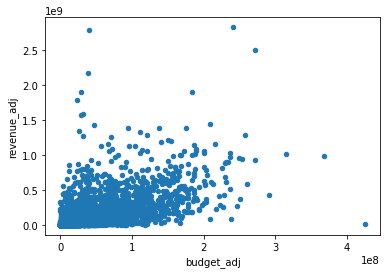

In [45]:
df_cleaned.plot('budget_adj', 'revenue_adj', kind='scatter');

In [46]:
# Let's use numpy to get the correlation between budget and revenue
# magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
# sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

np.corrcoef(df_cleaned.budget_adj, df_cleaned.revenue_adj)[0,1]

0.5704510195812402

> There is obviously a regular correlation between the cost of a movie and the revenue it gains.  
> But there are also some outliers.

<a id='conclusions'></a>
## Conclusions

> Most movies are tagged with the Drama genre. On 2nd through 4th positions, we see Comedy, Thriller and Action.  
Following positions are at a similar level but pretty far away from the top 4.  
The animation genre is by far the most popular genre. Followed by Fantasy, Advernture and Science Fiction.  
Looking at the trend of the budget, we can see a huge drop after the first year in the 70s.  
Starting from that drop in 1971, we can see up and downs, but with an increasing trend. 1997 was a year with the highest average budget within the last 30 years. Starting from that year, we can see a slightly decreasing trend of the average budget.    

> With my last question for that analysis I tried to figure out if there is a correlation between the money that was spent for a movie and the revenue it received.  
To answer that question, I used the specific numpy function 'corrcoef' to get the coefficient. Even though this value is not that close to 1, we obivously have a correlation between the budget and the revenue.  
The more money a movie costs, the more revenue it might gain.  
This could be due to a higher quality in terms of production and cast or simply a higher budget for marketing activities.

 
### Limitations
> Drama is by far the most popular genre. But we need to take care, as most movies have more than one genre assigned to and it seems that most movies have the characteristics of a drama. For instance, a movie can be an action movie with characteristics of drama, or it can be comedy and a drama. The fact that a movie can have more than one characteristic, makes it pretty tough to answer such a simple question about the genre with the highest average popularity. 